# Работа с MySQL из Python
Когда программы становятся больше, появляется необходимость хранить и обрабатывать большие объёмы данных — о товарах, пользователях, сообщениях, заказах и т.д.
Использование баз данных (например, MySQL) позволяет:
* Хранить структурированные данные вне программы
* Быстро искать, обновлять и удалять записи
* Работать с очень большими объёмами данных без загрузки их всех в память
* Обеспечить многопользовательский доступ и защиту данных
* Делать программы более надёжными и масштабируемыми
  
Для Python есть удобные библиотеки для соединения и работы с базами данных.


### Подключение к базе данных
Чтобы Python мог работать с MySQL, нужно использовать специальную библиотеку, которая умеет:
* устанавливать соединение с сервером базы данных;
* отправлять SQL-запросы и получать результаты;
* обрабатывать ошибки при работе с базой.


### Библиотеки для работы с MySQL
Наиболее популярные библиотеки:


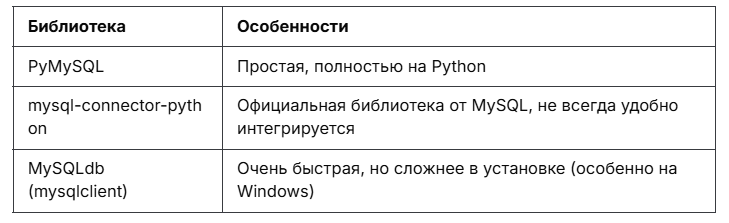

В этой лекции мы будем использовать PyMySQL, потому что она работает стабильно на всех операционных системах

##### Установка библиотеки
Перед началом нужно установить библиотеку:


In [ ]:
pip install pymysql

### Создание соединения
Чтобы подключиться к серверу MySQL, нужно:
* импортировать модуль pymysql,
* вызвать функцию pymysql.connect(),
* передать в неё параметры подключения.


In [ ]:
import pymysql               # импорт модуля

connection = pymysql.connect(
    host="localhost",        # адрес сервера базы данных
    user="root",             # имя пользователя
    password="yourpassword", # пароль для указанного пользователя
    database="yourdatabase", # название базы данных (необязательно)
    charset="utf8mb4",       # кодировка соединения (необязательно, указывать для поддержки русского)
)


##### Особенности:
* Параметры подключения можно передавать вручную.
* Либо можно хранить параметры в словаре и распаковать его с помощью ** при подключении.


In [ ]:
import pymysql

config = {'host': 'ich-db.edu.itcareerhub.de',
          'user': 'ich1',
          'password': 'password',
          'database': 'hr',
          }

connection = pymysql.connect(**config)  # распаковка словаря как аргументы


#### Когда удобно использовать словарь
* Когда параметры нужно передавать в разных частях программы.
* Когда подключений будет много — например, к разным базам данных.
* Когда параметры удобно хранить в файлах (.env, JSON, YAML и т.д.).


#### Проверка соединения
После создания объекта connection можно проверить соединение, выполнив проверку: 


In [ ]:
if connection.open:
    print("Connection successful!")


#### Закрытие соединения
После проверки соединение обязательно нужно закрыть: 


In [ ]:
connection.close()

#### Почему важно закрывать соединение
* Открытые соединения занимают ресурсы сервера базы данных.
* Если не закрывать соединения, можно быстро исчерпать лимит подключений.
* Правильная практика: всегда закрывать соединение, как только оно больше не нужно.


#### Работа с курсором
После подключения к базе данных необходимо создать объект курсора, через который:
* отправляются SQL-запросы в базу,
* получаются результаты выполнения запросов.


#### Создание курсора


In [ ]:
cursor = connection.cursor()

* cursor() — метод соединения (connection), который создаёт новый курсор для работы.
* Один cursor используется для выполнения одного или нескольких запросов.

#### Закрытие курсора
* После использования курсор нужно закрыть вручную, чтобы освободить ресурсы: 


In [ ]:
cursor.close()

* После закрытия курсор становится недействительным и для новых запросов нужно создать новый курсор.

#### Выполнение запросов
После создания курсора можно выполнять SQL-запросы с помощью метода execute().

##### Пример: выполнение простого SELECT запроса 

In [ ]:
connection = pymysql.connect(**config)
cursor = connection.cursor()

In [ ]:
cursor = connection.cursor()
cursor.execute("SELECT * FROM departments")

##### Особенности:
* cursor.execute(sql) — отправляет SQL-запрос к базе данных.
* SQL-запрос передаётся в виде строки.
* После выполнения запроса можно получить результат.
* Можно выполнять любой SQL-запрос: SELECT, INSERT, UPDATE, DELETE и др.
* После каждого нового запроса старые результаты очищаются (если результат не считать, некоторые библиотеки, например mysql-connector, вызовут ошибку при следующем запросе).
* При ошибке в запросе выбрасывается исключение.


#### Получение результатов запроса
После выполнения запроса SELECT данные остаются в курсоре, пока не будут получены. Для их получения курсор можно использовать как итератор в цикле. 


In [ ]:
cursor.execute("SELECT * FROM employees")

for row in cursor:
    print(row)

##### Особенности:
* Каждая итерация даёт одну строку результата (в виде кортежа)
* Все строки читаются последовательно, до окончания выборки


### Параметризованные запросы
При выполнении запросов в базу данных **никогда нельзя подставлять значения напрямую в строку SQL**. Это может привести к **SQL-инъекциям**.  
**SQL-инъекция** — это тип уязвимости, при котором злоумышленник может вставить произвольный SQL-код в запрос, чтобы получить несанкционированный доступ к данным, изменить или удалить информацию в базе данных.


In [ ]:
# Прямое включение пользовательского ввода
user_input = "1 OR 1=1"
sql = f"SELECT * FROM employees WHERE employee_id = {user_input}"
cursor.execute(sql)  # выполнит: SELECT * FROM employees WHERE employee_id = 1 OR 1=1
# Получены все записи, вместо одной
for r in cursor:
    print(r)


Вместо этого нужно использовать параметризованные запросы: значения передаются отдельно от текста запроса.

##### Синтаксис: 


In [ ]:
cursor.execute(
    "SELECT * FROM table_name WHERE column1 = %s AND column2 > %s",
    (value1, value2)
)


* Первый аргумент — SQL-запрос с плейсхолдерами %s
* Второй аргумент — последовательность значений (кортеж или список), которые подставляются вместо %s

##### Пример: несколько значений 

In [ ]:
cursor.execute(
    "SELECT * FROM employees WHERE department_id = %s OR salary > %s",
    (60, 20000)
)
for r in cursor:
    print(r)

* Подставляются оба значения в соответствующие %s.
* Порядок значений в последовательности должен совпадать с порядком %s в запросе.

##### Пример: одно значение 

In [ ]:
cursor.execute(
    "SELECT * FROM employees WHERE department_id = %s",
    (100,)  # Обязательно запятая!
)
for r in cursor:
    print(r)

* Если передаётся только одно значение, нужно ставить запятую после него, чтобы создать кортеж.

##### Преимущества параметризованных запросов
* Безопасность — защита от SQL-инъекций
* Универсальность — одно и то же выражение можно выполнять с разными данными
* Автоматическое экранирование — библиотека сама правильно обрабатывает типы данных (строки, числа и т.д.)
* Улучшение производительности — сервер базы данных может кэшировать план выполнения запроса


#### Именованные параметры
Вместо позиционных %s, в запросах можно использовать именованные параметры. Это делает код более читабельным, особенно когда передаётся много значений.


In [ ]:
cursor.execute(
    "SELECT * FROM table_name WHERE column1 = %(param1)s AND column2 > %(param2)s",
    {"param1": value1, "param2": value2}
)


* В SQL-запросе используются плейсхолдеры вида %(name)s
* Вторым аргументом передаётся словарь, где ключи соответствуют плейсхолдерам
* Порядок ключей в словаре не важен — главное, чтобы ключи словаря совпадали с именами плейсхолдеров в запросе


In [ ]:
cursor.execute(
    "SELECT * FROM employees WHERE department_id = %(dep_id)s OR salary > %(min_salary)s",
    {"min_salary": 20000, "dep_id": 60}
)
for r in cursor:
    print(r)

##### Преимущества:
* Повышается читаемость запроса
* Удобно, когда значения приходят как словарь
* Легче избежать ошибок с порядком аргументов


## Контекстный менеджер with
Чтобы упростить работу с соединением и курсором, можно использовать конструкцию with, которая автоматически закрывает ресурсы даже при ошибках.
Это делает код чище и защищает от утечек соединений.


In [ ]:
with pymysql.connect(
    host='ich-db.edu.itcareerhub.de',
    user='ich1',
    password='password',
    database='hr'
) as connection:  # автоматически закроет connection
    with connection.cursor() as cursor:  # автоматически закроет cursor
        cursor.execute("SELECT * FROM employees")
        for row in cursor:
            print(row)


##### Особенности:
* Блок with автоматически вызывает close() для курсора и/или соединения
* Код становится компактнее и безопаснее
* Даже если внутри блока произойдёт ошибка — ресурсы корректно закроются

### Метод commit
Чтобы добавить, изменить или удалить данные в базе, используются запросы INSERT, UPDATE, DELETE. Но у них есть важная особенность — данные сначала попадают во временное хранилище транзакции.  
Чтобы окончательно записать изменения в базу данных, необходимо вызвать метод: 


In [ ]:
connection.commit()

##### Зачем это нужно?
* Без commit() изменения не сохраняются и будут потеряны при закрытии соединения.
* Это поведение обеспечивает безопасность: изменения применяются только после явного подтверждения.
* Создание базы данных и таблиц (CREATE DATABASE, CREATE TABLE) не требует вызова commit() — эти команды сохраняются сразу.


#### Подключение к серверу с правами на изменения
Чтобы создавать базы и таблицы, подключитесь к серверу с правами на изменения: 


In [ ]:
config = {'host': 'ich-edit.edu.itcareerhub.de',
          'user': 'ich1',
          'password': 'ich1_password_ilovedbs',
          }

connection = pymysql.connect(**config)

Обратите внимание, что базу данных при подключении можно не указывать и выбрать ее позже.

##### Пример: создание базы и таблицы sales 

In [ ]:
with connection.cursor() as cursor:
    # Создание новой базы данных (если ещё не существует)
    cursor.execute("CREATE DATABASE IF NOT EXISTS market")
    cursor.execute("USE market")

    # Создание таблицы продаж
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS sales (
            id INT AUTO_INCREMENT PRIMARY KEY,
            item_name VARCHAR(100),
            quantity INT,
            price DECIMAL(10, 2),
            sale_date DATE
        )
    """)


##### Пример: вставка данных 


In [ ]:
with connection.cursor() as cursor:
cursor.execute(
    "INSERT INTO sales (item_name, quantity, price, sale_date) VALUES (%s, %s, %s, %s)",
    ("Keyboard", 2, 45.50, "2024-06-15")
)
connection.commit()  # Сохраняем изменения

##### Пример: обновление данных 

In [ ]:
with connection.cursor() as cursor:
cursor.execute(
    "UPDATE sales SET quantity = %s WHERE item_name = %s",
    (3, "Keyboard")
)
connection.commit()


##### Пример: удаление данных 

In [ ]:
with connection.cursor() as cursor:
cursor.execute(
    "DELETE FROM sales WHERE item_name = %s",
    ("Keyboard",)
)
connection.commit()


### Метод executemany
Метод `executemany()` используется для многократного выполнения одного и того же SQL-запроса с разными данными. Это удобно и эффективно при массовом добавлении, обновлении или удалении строк.


In [ ]:
with connection.cursor() as cursor:
cursor.executemany(
    "INSERT INTO sales (item_name, quantity, price, sale_date) VALUES (%s, %s, %s, %s)",
    [
        ("Notebook", 3, 19.99, "2024-06-15"),
        ("Pen", 10, 1.99, "2024-06-16"),
        ("Bag", 1, 49.90, "2024-06-17")
    ]
)
connection.commit()


##### Особенности:
* Работает только с изменяющими запросами (INSERT, UPDATE, DELETE)
* Вторым аргументом передаётся список кортежей
* Экономит ресурсы, т.к. запрос компилируется один раз, а выполняется много


# Практические задания
1. **Список всех департаментов**  
> Используя базу данных hr, выведите названия всех департаментов из таблицы departments. Каждое название должно отображаться с новой строки и иметь номер.

*Пример вывода:*    
1. Administration  
2. Marketing  
3. Purchasing  
...    
27. Payroll  


In [ ]:
import pymysql

config = {'host': 'ich-db.edu.itcareerhub.de',
          'user': 'ich1',
          'password': 'password',
          'database': 'hr',
          }

with pymysql.connect(**config) as connection:
    with connection.cursor() as cursor:
        cursor.execute("SELECT department_name FROM departments")
        departments = [row[0] for row in cursor]
        for i, name in enumerate(departments, start=1):
            print(f"{i}. {name}")


2. **Сотрудники выбранного департамента**
> Добавьте к предыдущей программе возможность выбора департамента. Пусть пользователь введёт название из списка. Далее выведите всех сотрудников этого департамента, указав имя, фамилию и должность.

*Пример вывода:*   
Enter department: Marketing  
Michael Hartstein — Marketing Manager  
Pat Fay — Marketing Representative  
...


In [ ]:
selected_department = input("Enter department: ")

with pymysql.connect(**config) as connection:
    with connection.cursor() as cursor:
        cursor.execute("""
            SELECT first_name, last_name, job_title
            FROM employees
            JOIN departments ON employees.department_id = departments.department_id
            JOIN jobs ON employees.job_id = jobs.job_id
            WHERE departments.department_name = %s
        """, (selected_department,))

        for res in cursor:
            print(f"{res[0]} {res[1]} — {res[2]}")


3. **Добавление товаров в таблицу**  
> Напишите программу, которая подключается к базе данных market, затем:  
* создаёт таблицу products, если она ещё не существует  
* добавляет в неё несколько товаров (название и цена)  
* выводит список товаров в БД с их ценами

*Данные:*  
```
products = [
    ("Notebook", 10.00),
    ("Pencil", 1.00),
    ("Bag", 25.00)
]
```
*Пример вывода:*   
```
Products in the database:  
1. Notebook — $10.00  
2. Pencil — $1.00
3. Bag — $25.00   
```

In [ ]:
import pymysql

config = {
    'host': 'ich-edit.edu.itcareerhub.de',
    'user': 'ich1',
    'password': 'ich1_password_ilovedbs',
}

with pymysql.connect(**config) as connection:
    with connection.cursor() as cursor:
        cursor.execute("CREATE DATABASE IF NOT EXISTS market")
        cursor.execute("USE market")

        cursor.execute("""
            CREATE TABLE IF NOT EXISTS products (
                id INT AUTO_INCREMENT PRIMARY KEY,
                name VARCHAR(100),
                price DECIMAL(10, 2)
            )
        """)

        products = [
            ("Notebook", 10.00),
            ("Pencil", 1.00),
            ("Bag", 25.00)
        ]
        cursor.executemany(
            "INSERT INTO products (name, price) VALUES (%s, %s)",
            products
        )
        connection.commit()

        print("Products in the database:")
        cursor.execute("SELECT id, name, price FROM products")
        for row in cursor:
            print(f"{row[0]}. {row[1]} — ${row[2]:.2f}")
